# 04: Load the combined dataframe, and do some plotting 

In [ ]:
# import relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats

# change the font for the whole plot
plt.rcParams["font.family"] = "Times New Roman"

# Read in the data
df = pd.read_csv("processed_data/sales_and_weather_2021-2022.csv")
df_cold = pd.read_csv("processed_data/sales_and_weather_2021-2022_ONLY_COLD.csv")
df_warm = pd.read_csv("processed_data/sales_and_weather_2021-2022_ONLY_WARM.csv")

# Drop the null values from the variables
df = df.dropna(subset=["temperature_mean", "temperature_min", "temperature_max", "precipitation"])
df_cold = df_cold.dropna(subset=["temperature_mean", "temperature_min", "temperature_max", "precipitation"])
df_warm = df_warm.dropna(subset=["temperature_mean", "temperature_min", "temperature_max", "precipitation"])
df


,date,day_of_week,month,year,week_of_year,Getränke_sales,Coffee_sales,Cappuccino_sales,Flat White_sales,Cappuccino groß_sales,...,precipitation,temperature_mean,temperature_max,temperature_min,sunshine_duration,cloud_cover,wind_speed,humidity,pressure,snow_depth
0,2021-01-02,Saturday,January,2021,53,692.9,596.4,230.4,98.8,72.2,...,0.8,0.0,1.0,-1.6,0.0,8.0,2.2,89.0,1012.7,0.0
1,2021-01-04,Monday,January,2021,1,429.2,371.9,192.0,38.0,30.4,...,0.0,0.0,0.9,-0.9,0.0,8.0,2.1,89.0,1013.4,0.0
2,2021-01-05,Tuesday,January,2021,1,392.8,378.0,144.0,41.8,22.8,...,1.0,0.5,1.1,-0.4,0.0,8.0,2.2,92.0,1012.5,0.0
3,2021-01-07,Thursday,January,2021,1,493.2,414.2,179.2,34.2,53.2,...,0.1,0.3,1.3,-1.0,0.0,8.0,1.5,89.0,1015.3,3.0
4,2021-01-08,Friday,January,2021,1,557.5,483.5,185.6,102.6,72.2,...,0.0,0.0,1.1,-1.9,0.1,7.0,2.0,84.0,1016.3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,2022-09-26,Monday,September,2022,39,882.0,799.4,190.4,57.0,58.8,...,3.3,11.3,15.9,6.7,3.6,NaN,2.8,78.0,1008.2,NaN
606,2022-09-27,Tuesday,September,2022,39,817.1,742.0,136.0,68.4,54.6,...,5.9,9.4,12.5,6.8,2.7,NaN,4.3,81.0,1001.2,NaN
607,2022-09-28,Wednesday,September,2022,39,847.2,778.6,142.8,68.4,58.8,...,1.0,9.3,12.0,5.6,0.4,NaN,2.6,83.0,999.5,NaN
608,2022-09-29,Thursday,September,2022,39,954.0,882.9,163.2,68.4,79.8,...,0.0,9.0,13.5,4.4,1.1,NaN,1.0,81.0,1003.0,NaN


In [ ]:
# set parameters for the plots

general_color = "cornflowerblue"
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_colors = ["midnightblue", "mediumblue", "royalblue", "lightskyblue", "aquamarine", "palegreen", "mediumseagreen"]

axes_fontsize = 16
title_fontsize = 24
label_fontsize = 20
legend_fontsize = 16

page_width = 16 # inches


## 1. Plot the entire sales and weather data on whole date range

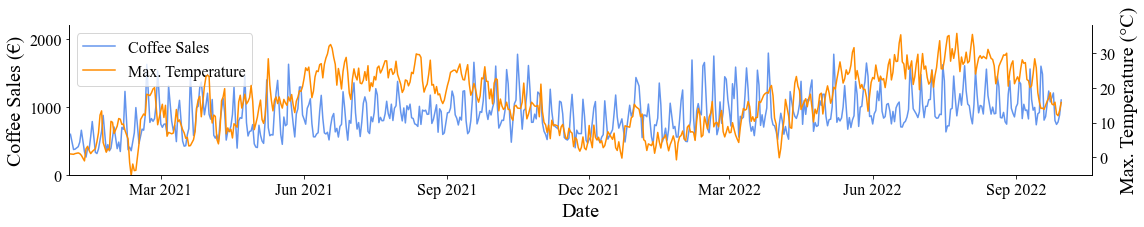

In [ ]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(16, 3))

# Plot the max temperature and the sales for each day of the week
lns1 = ax.plot(df["date"].astype("datetime64"), df["Coffee_sales"].astype("float"), color="cornflowerblue", label="Coffee Sales")
ax2 = ax.twinx()
lns2 = ax2.plot(df["date"].astype("datetime64"), df["temperature_max"].astype("float"), color="darkorange", label="Max. Temperature")
ax.set_ylim(0, 2200)
ax2.set_ylim(-5, 38)
ax.set_yticks(np.arange(0, 2500, 1000))
ax2.set_yticks(np.arange(0, 40, 10))
ax.set_xlim(pd.Timestamp('2021-01-01'), pd.Timestamp('2022-10-20'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3, ))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.tick_params(axis="both", which="major", labelsize=axes_fontsize)
ax2.tick_params(axis="both", which="major", labelsize=axes_fontsize)
ax.set_xlabel("Date", fontsize=label_fontsize)
ax.set_ylabel("Coffee Sales (€)", fontsize=label_fontsize)
ax2.set_ylabel("Max. Temperature (°C)", fontsize=label_fontsize)
ax.spines["top"].set_visible(False)
ax2.spines["top"].set_visible(False)
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc="upper left", fontsize=legend_fontsize)
plt.tight_layout()
plt.savefig("results/coffee_sales.pdf", dpi=300, bbox_inches="tight")
plt.show()

## 2. Plot general correlations

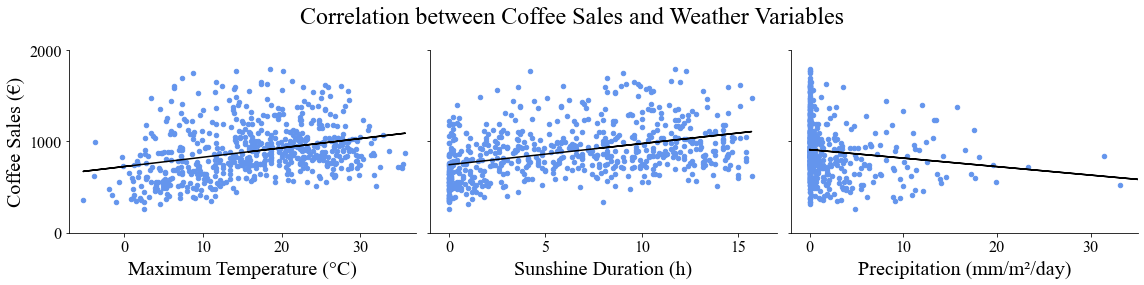

In [ ]:
sales_variable = "Coffee_sales"

# plot the correlation between sales and max temperature
fig, axes = plt.subplots(1, 3, figsize=(page_width, 4), sharey=True)
weather_variable_1 = "temperature_max"
axes[0].scatter(df[weather_variable_1], df[sales_variable], s=20,  marker="o", color=general_color)
axes[0].set_xlabel("Maximum Temperature (°C)", fontsize=label_fontsize)
axes[0].set_ylabel("Coffee Sales (€)",         fontsize=label_fontsize)
axes[0].set_ylim(0, 1800)
axes[0].set_yticks(np.arange(0, 2500, 1000))
axes[0].set_xlim(-7, 37)
axes[0].set_xticks(np.arange(0, 40, 10))
X = df[weather_variable_1].values.reshape(-1, 1)
y = df[sales_variable].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
axes[0].plot(X, reg.predict(X), color="black")
corr = scipy.stats.pearsonr(df[sales_variable], df[weather_variable_1])[0]
pval = scipy.stats.pearsonr(df[sales_variable], df[weather_variable_1])[1]

# plot the correlation between sales and sunshine duration
weather_variable_2 = "sunshine_duration"
axes[1].scatter(df[weather_variable_2], df[sales_variable], s=20,  marker="o", color=general_color)
axes[1].set_xlabel("Sunshine Duration (h)", fontsize=label_fontsize)
axes[1].set_xlim(-1, 17)
axes[1].set_xticks(np.arange(0, 20, 5))
X = df[weather_variable_2].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
axes[1].plot(X, reg.predict(X), color="black")
corr = scipy.stats.pearsonr(df[sales_variable], df[weather_variable_2])[0]
pval = scipy.stats.pearsonr(df[sales_variable], df[weather_variable_2])[1]

# plot the correlation between sales and precipitation
weather_variable_3 = "precipitation"
axes[2].scatter(df[weather_variable_3], df[sales_variable], s=20,  marker="o", color=general_color)
axes[2].set_xlabel("Precipitation (mm/m²/day)", fontsize=label_fontsize)
axes[2].set_xlim(-2, 35)
axes[2].set_xticks(np.arange(0, 40, 10))
X = df[weather_variable_3].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
axes[2].plot(X, reg.predict(X), color="black")
corr = scipy.stats.pearsonr(df[sales_variable], df[weather_variable_3])[0]
pval = scipy.stats.pearsonr(df[sales_variable], df[weather_variable_3])[1]

for ax in axes:
    ax.tick_params(axis="both", which="major", labelsize=axes_fontsize)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

fig.suptitle("Correlation between Coffee Sales and Weather Variables", fontsize=title_fontsize)
plt.tight_layout()
plt.savefig("results/temp_sun_precip.pdf", bbox_inches="tight", dpi=300)
plt.show()

In [ ]:
# calculate the correlation between sales and mean temperature

#corr = df["Getränke_sales"].corr(df["temperature_max"])
corr = scipy.stats.pearsonr(df["Coffee_sales"], df["temperature_max"])[0]
pval = scipy.stats.pearsonr(df["Coffee_sales"], df["temperature_max"])[1]
print("Correlation between overall sales and max temperature is about: {:.2f}".format(corr) + ". The correlation has a p-value of: {:.4f}".format(pval))

#corr = df["Getränke_sales"].corr(df["temperature_max"])
corr = scipy.stats.pearsonr(df["Coffee_sales"], df["sunshine_duration"])[0]
pval = scipy.stats.pearsonr(df["Coffee_sales"], df["sunshine_duration"])[1]
print("Correlation between overall sales and sunshine duration is about: {:.2f}".format(corr) + ". The correlation has a p-value of: {:.4f}".format(pval))

#corr = df["Getränke_sales"].corr(df["temperature_max"])
corr = scipy.stats.pearsonr(df["Coffee_sales"], df["precipitation"])[0]
pval = scipy.stats.pearsonr(df["Coffee_sales"], df["precipitation"])[1]
print("Correlation between overall sales and precipitation is about: {:.2f}".format(corr) + ". The correlation has a p-value of: {:.4f}".format(pval))




Correlation between sales and max temperature is about: 0.30. The correlation has a p-value of: 0.0000
Correlation between sales and sunshine duration is about: 0.38. The correlation has a p-value of: 0.0000
Correlation between sales and precipitation is about: -0.15. The correlation has a p-value of: 0.0003


# 3. Plot average coffee sales per weekday

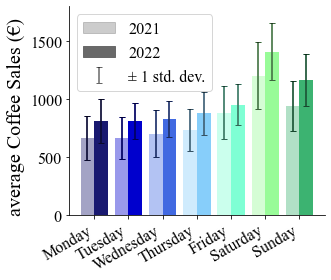

In [ ]:
weather_variable = "temperature_max"
sales_variable = "Coffee_sales"

# Plot the average coffee sales per weekday in a bar plot with error bars.
fig, ax = plt.subplots(1, 1, figsize=(page_width*0.3, 4), sharey=True, sharex=True)
fig.supylabel("average Coffee Sales (€)", fontsize=label_fontsize, x=0.050, y=0.58)
width = 0.4
for i, day in enumerate(days):
    ax.bar(i+1-0.5*width, df[(df["day_of_week"] == day) & (df["year"] == 2021)][sales_variable].astype("float").mean(), label=day, color=day_colors[i], width=width, alpha=0.4, )
    ax.bar(i+1+0.5*width, df[(df["day_of_week"] == day) & (df["year"] == 2022)][sales_variable].astype("float").mean(), label=day, color=day_colors[i], width=width)
    ax.errorbar(i+1-0.5*width, df[(df["day_of_week"] == day) & (df["year"] == 2021)][sales_variable].astype("float").mean(), yerr=df[(df["day_of_week"] == day) & (df["year"] == 2021)][sales_variable].astype("float").std(), fmt="none", color=day_colors[i], capsize=3)
    ax.errorbar(i+1+0.5*width, df[(df["day_of_week"] == day) & (df["year"] == 2022)][sales_variable].astype("float").mean(), yerr=df[(df["day_of_week"] == day) & (df["year"] == 2022)][sales_variable].astype("float").std(), fmt="none", color=day_colors[i], capsize=3)
    ax.errorbar(i+1-0.5*width, df[(df["day_of_week"] == day) & (df["year"] == 2021)][sales_variable].astype("float").mean(), yerr=df[(df["day_of_week"] == day) & (df["year"] == 2021)][sales_variable].astype("float").std(), fmt="none", color="black", capsize=3, alpha=0.6, label = "2021")
    ax.errorbar(i+1+0.5*width, df[(df["day_of_week"] == day) & (df["year"] == 2022)][sales_variable].astype("float").mean(), yerr=df[(df["day_of_week"] == day) & (df["year"] == 2022)][sales_variable].astype("float").std(), fmt="none", color="black", capsize=3, alpha=0.6)
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
        tick.set_horizontalalignment("right")
    ax.set_xticks(np.arange(1, 8))
    ax.set_xticklabels(days)
    ax.set_ylim(0, 1800)
    ax.set_yticks(np.arange(0, 1600, 500))
    ax.tick_params(axis="both", which="major", labelsize=axes_fontsize)
    
t = ["2021", "2022", "± 1 std. dev."]
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles[:3], t, fontsize=legend_fontsize)
leg.legendHandles[0].set_color('grey')
leg.legendHandles[1].set_color('dimgrey')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.tight_layout()
plt.savefig("results/mean_sales_by_day_of_week.pdf", dpi=300, format="pdf")
plt.show()


## 4. Plot the per day correlation between sales and maximum temperature / sunshine hours / precipitation

In [ ]:
def plot_correlation(df, weather_variable, sales_variable, condition, condition_value, ax, s, marker, color=None, show_condition=False):
    df= df[df[condition] == condition_value]
    ax.scatter(df[weather_variable], df[sales_variable], color=color, s=s, marker=marker)
    X = df[weather_variable].values.reshape(-1, 1)
    y = df[sales_variable].values.reshape(-1, 1)
    reg = LinearRegression().fit(X, y)
    ax.plot(X, reg.predict(X), color="black")
    corr = scipy.stats.pearsonr(df[sales_variable], df[weather_variable])[0]
    pval = scipy.stats.pearsonr(df[sales_variable], df[weather_variable])[1]
    print("Correlation between sales and " + weather_variable + " on " + condition_value + " is about: {:.2f}".format(corr) + ". The correlation has a p-value of: {:.4f}".format(pval))

    ax.set_title(f"{condition_value}", fontsize=18, alpha=1.0 if show_condition else 0.0)

Correlation between sales and temperature_max on Monday is about: 0.56. The correlation has a p-value of: 0.0000
Correlation between sales and temperature_max on Tuesday is about: 0.63. The correlation has a p-value of: 0.0000
Correlation between sales and temperature_max on Wednesday is about: 0.48. The correlation has a p-value of: 0.0000
Correlation between sales and temperature_max on Thursday is about: 0.45. The correlation has a p-value of: 0.0000
Correlation between sales and temperature_max on Friday is about: 0.43. The correlation has a p-value of: 0.0000
Correlation between sales and temperature_max on Saturday is about: 0.29. The correlation has a p-value of: 0.0057
Correlation between sales and temperature_max on Sunday is about: 0.13. The correlation has a p-value of: 0.2654


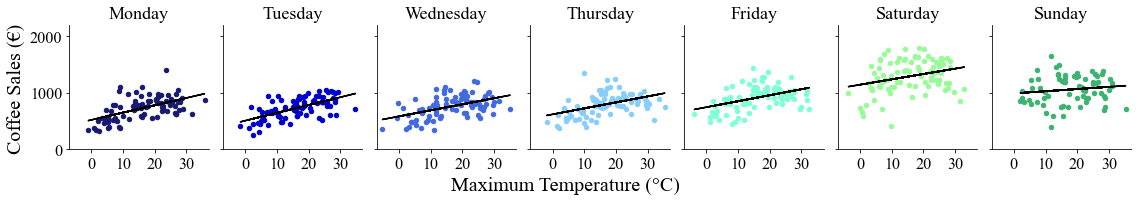

In [ ]:
weather_variable = "temperature_max"
sales_variable = "Coffee_sales"

# Plot the correlation between the max temperature and the sales for each day of the week.
fig, axes = plt.subplots(1, 7, figsize=(page_width, 3), sharey=True, sharex=True, frameon=True)
fig.supxlabel("Maximum Temperature (°C)", fontsize=label_fontsize, x=0.5, y=0.08) 
fig.supylabel("Coffee Sales (€)",         fontsize=label_fontsize, x=0.015, y=0.57)
for i, day in enumerate(days):
    plot_correlation(df, weather_variable, sales_variable, "day_of_week", day, axes[i], 20, "o", day_colors[i], True)
    axes[i].set_ylim(0, 2200)
    axes[i].set_yticks(np.arange(0, 2500, 1000))
    axes[i].set_xlim(-7, 37)
    axes[i].set_xticks(np.arange(0, 40, 10))
    axes[i].tick_params(axis="both", which="major", labelsize=axes_fontsize)
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)
plt.tight_layout()
plt.savefig("results/correlation_by_day_of_week.pdf", dpi=300, bbox_inches="tight")
plt.show()

Correlation between sales and sunshine_duration on Monday is about: 0.46. The correlation has a p-value of: 0.0000
Correlation between sales and sunshine_duration on Tuesday is about: 0.58. The correlation has a p-value of: 0.0000
Correlation between sales and sunshine_duration on Wednesday is about: 0.51. The correlation has a p-value of: 0.0000
Correlation between sales and sunshine_duration on Thursday is about: 0.49. The correlation has a p-value of: 0.0000
Correlation between sales and sunshine_duration on Friday is about: 0.49. The correlation has a p-value of: 0.0000
Correlation between sales and sunshine_duration on Saturday is about: 0.49. The correlation has a p-value of: 0.0000
Correlation between sales and sunshine_duration on Sunday is about: 0.33. The correlation has a p-value of: 0.0042


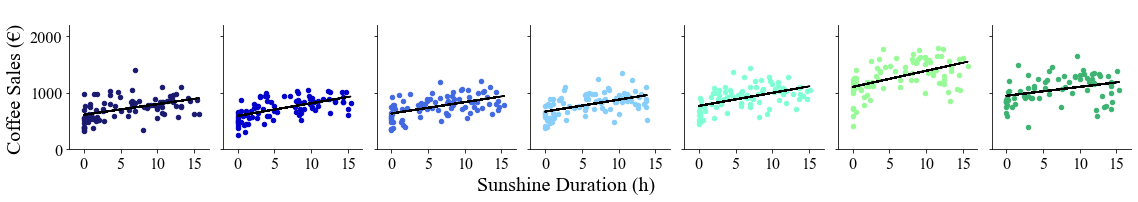

In [ ]:
weather_variable = "sunshine_duration"
sales_variable = "Coffee_sales"

# Plot the correlation between sunshine hours and the sales for each day of the week.
fig, axes = plt.subplots(1, 7, figsize=(page_width, 3), sharey=True, sharex=True, frameon=True)
fig.supxlabel("Sunshine Duration (h)", fontsize=label_fontsize, x=0.5, y=0.08) 
fig.supylabel("Coffee Sales (€)",      fontsize=label_fontsize, x=0.015, y=0.57)
for i, day in enumerate(days):
    plot_correlation(df, weather_variable, sales_variable, "day_of_week", day, axes[i], 20, "o", day_colors[i])
    axes[i].set_ylim(0, 2200)
    axes[i].set_yticks(np.arange(0, 2500, 1000))
    axes[i].set_xlim(-2, 17)
    axes[i].set_xticks(np.arange(0, 20, 5))
    axes[i].tick_params(axis="both", which="major", labelsize=axes_fontsize)
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)
plt.tight_layout()
plt.savefig("results/correlation_sunshine_by_day_of_week.pdf", dpi=300, bbox_inches="tight")
plt.show()

Correlation between sales and precipitation on Monday is about: -0.01. The correlation has a p-value of: 0.9474
Correlation between sales and precipitation on Tuesday is about: -0.17. The correlation has a p-value of: 0.1223
Correlation between sales and precipitation on Wednesday is about: -0.27. The correlation has a p-value of: 0.0116
Correlation between sales and precipitation on Thursday is about: -0.16. The correlation has a p-value of: 0.1248
Correlation between sales and precipitation on Friday is about: -0.34. The correlation has a p-value of: 0.0012
Correlation between sales and precipitation on Saturday is about: -0.27. The correlation has a p-value of: 0.0113
Correlation between sales and precipitation on Sunday is about: -0.28. The correlation has a p-value of: 0.0142


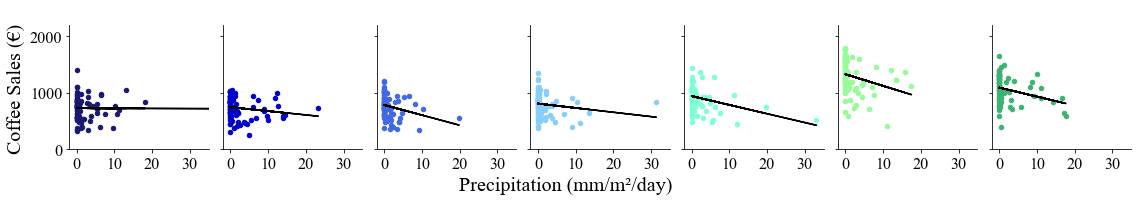

In [ ]:
weather_variable = "precipitation"
sales_variable = "Coffee_sales"

# Plot the correlation between the precipitation and the sales for each day of the week.
fig, axes = plt.subplots(1, 7, figsize=(page_width, 3), sharey=True, sharex=True, frameon=True)
fig.supxlabel("Precipitation (mm/m²/day)", fontsize=label_fontsize, x=0.5, y=0.08)
fig.supylabel("Coffee Sales (€)",          fontsize=label_fontsize, x=0.015, y=0.57)
for i, day in enumerate(days):
    plot_correlation(df, weather_variable, sales_variable, "day_of_week", day, axes[i], 20, "o", day_colors[i])
    axes[i].set_ylim(0, 2200)
    axes[i].set_yticks(np.arange(0, 2500, 1000))
    axes[i].set_xlim(-2, 35)
    axes[i].set_xticks(np.arange(0, 40, 10))
    axes[i].tick_params(axis="both", which="major", labelsize=axes_fontsize)
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)
plt.tight_layout()
plt.savefig("results/correlation_precipitation_by_day_of_week.pdf", dpi=300, bbox_inches="tight")
plt.show()

## 5. Plot the correlation between sales data for cold / warm drinks and the maximum temperature

We found that cold drinks had a higher correlation with the temperature than warm ones.



Correlation between sales and temperature_max on Monday is about: 0.08. The correlation has a p-value of: 0.4503
Correlation between sales and temperature_max on Tuesday is about: 0.08. The correlation has a p-value of: 0.4569
Correlation between sales and temperature_max on Wednesday is about: -0.05. The correlation has a p-value of: 0.6191
Correlation between sales and temperature_max on Thursday is about: -0.11. The correlation has a p-value of: 0.2996
Correlation between sales and temperature_max on Friday is about: -0.13. The correlation has a p-value of: 0.2073
Correlation between sales and temperature_max on Saturday is about: -0.29. The correlation has a p-value of: 0.0067
Correlation between sales and temperature_max on Sunday is about: -0.51. The correlation has a p-value of: 0.0000


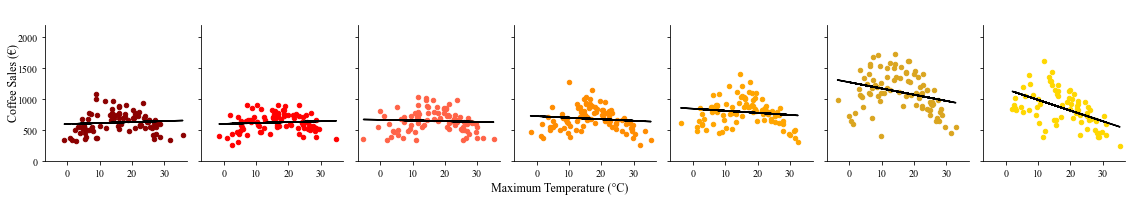

Correlation between sales and temperature_max on Monday is about: 0.78. The correlation has a p-value of: 0.0000
Correlation between sales and temperature_max on Tuesday is about: 0.82. The correlation has a p-value of: 0.0000
Correlation between sales and temperature_max on Wednesday is about: 0.80. The correlation has a p-value of: 0.0000
Correlation between sales and temperature_max on Thursday is about: 0.79. The correlation has a p-value of: 0.0000
Correlation between sales and temperature_max on Friday is about: 0.85. The correlation has a p-value of: 0.0000
Correlation between sales and temperature_max on Saturday is about: 0.83. The correlation has a p-value of: 0.0000
Correlation between sales and temperature_max on Sunday is about: 0.84. The correlation has a p-value of: 0.0000


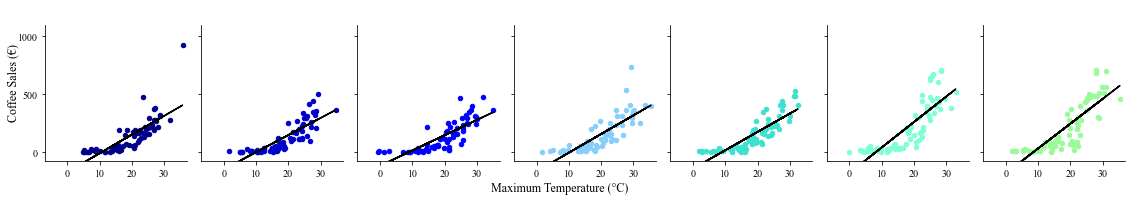

In [ ]:
day_colors_warm = ["darkred", "red", "tomato", "darkorange", "orange", "goldenrod", "gold",  ]
day_colors_cold = ["darkblue", "mediumblue", "blue", "lightskyblue", "turquoise", "aquamarine", "palegreen", ]

sales_variable = "Coffee_sales"
weather_variable = "temperature_max"

# Plot the correlation between the max temperature and sales data for warm drinks for each day of the week
fig, axes = plt.subplots(1, 7, figsize=(16, 3), sharey=True, sharex=True, frameon=True)
fig.supxlabel("Maximum Temperature (°C)", fontsize=12, x=0.5, y=0.08) 
fig.supylabel("Coffee Sales (€)", fontsize=12, x=0.02, y=0.6)
for i, day in enumerate(days):
    plot_correlation(df_warm, weather_variable, sales_variable, "day_of_week", day, axes[i], 20, "o", day_colors_warm[i])
    axes[i].set_ylim(0, 2200)
    axes[i].set_yticks(np.arange(0, 2500, 500))
    axes[i].set_xlim(-7, 37)
    axes[i].set_xticks(np.arange(0, 40, 10))
    
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)
# tight layout to avoid overlapping of the x-axis labels

plt.tight_layout()
plt.show()

# Plot the correlation between the max temperature and sales data of cold drinks for each day of the week
fig, axes = plt.subplots(1, 7, figsize=(16, 3), sharey=True, sharex=True, frameon=True)
fig.supxlabel("Maximum Temperature (°C)", fontsize=12, x=0.5, y=0.08) 
fig.supylabel("Coffee Sales (€)", fontsize=12, x=0.02, y=0.6)
for i, day in enumerate(days):
    plot_correlation(df_cold, weather_variable, sales_variable, "day_of_week", day, axes[i], 20, "o", day_colors_cold[i])
    axes[i].set_ylim(-80, 1100)
    axes[i].set_yticks(np.arange(0, 1100, 500))
    axes[i].set_xlim(-7, 37)
    axes[i].set_xticks(np.arange(0, 40, 10))
    
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)
# tight layout to avoid overlapping of the x-axis labels

plt.tight_layout()
plt.show()
